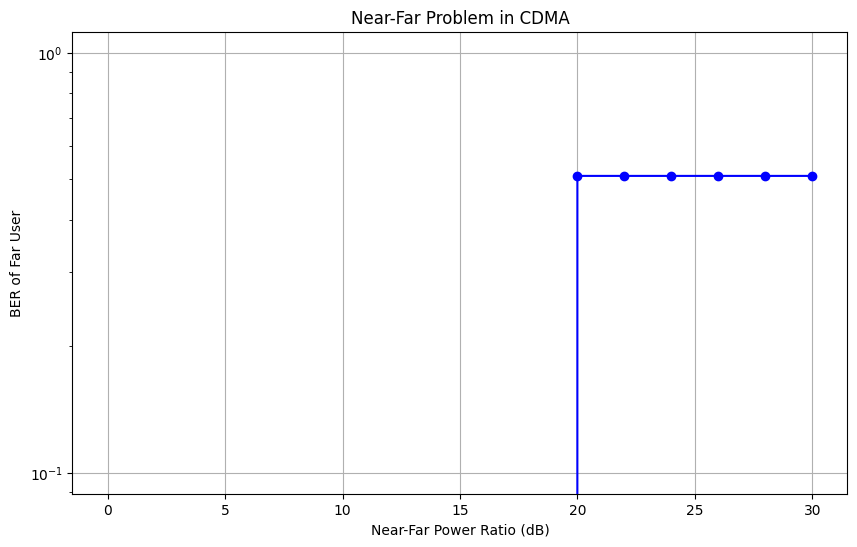

BER at 20dB power ratio: 5.09e-01


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_near_far():
    # System parameters
    chips_per_bit = 32
    n_bits = 1000

    # Generate spreading codes
    code1 = np.random.choice([1, -1], chips_per_bit)
    code2 = np.random.choice([1, -1], chips_per_bit)

    # User data
    data1 = np.random.choice([1, -1], n_bits)  # Near user
    data2 = np.random.choice([1, -1], n_bits)  # Far user

    # Power ratios to test
    power_ratios_db = np.arange(0, 31, 2)
    ber_values = []

    for power_ratio_db in power_ratios_db:
        power_ratio = 10**(power_ratio_db/10)
        errors = 0

        for i in range(n_bits):
            # Spread signals
            signal1 = np.sqrt(power_ratio) * data1[i] * code1  # Near user (stronger)
            signal2 = 1.0 * data2[i] * code2                   # Far user (weaker)

            # Combined received signal
            received = signal1 + signal2

            # Try to detect far user's data
            detected = np.sign(np.sum(received * code2))
            if detected != data2[i]:
                errors += 1

        ber = errors/n_bits
        ber_values.append(ber)

    plt.figure(figsize=(10, 6))
    plt.semilogy(power_ratios_db, ber_values, 'b-o')
    plt.grid(True)
    plt.xlabel('Near-Far Power Ratio (dB)')
    plt.ylabel('BER of Far User')
    plt.title('Near-Far Problem in CDMA')
    plt.show()

    print(f"BER at 20dB power ratio: {ber_values[10]:.2e}")

simulate_near_far()

## Robustness to near-far problem

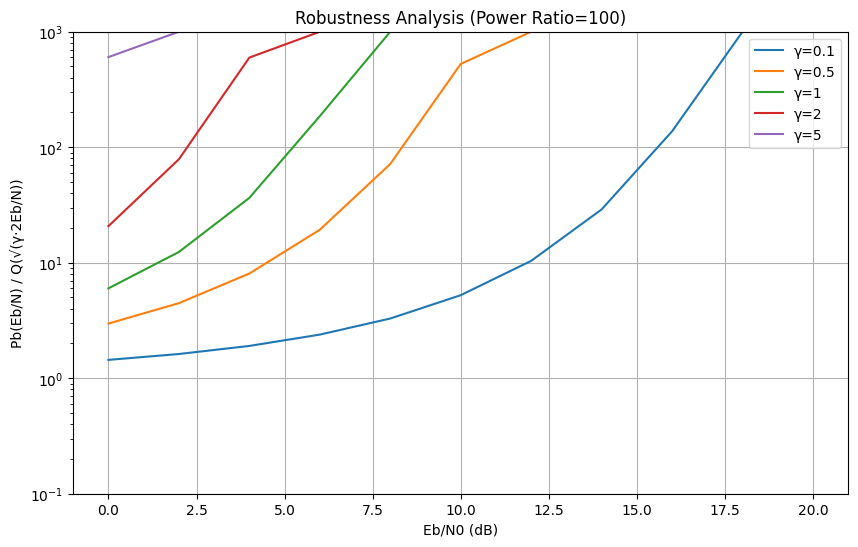

In [3]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

def Q_function(x):
    return 0.5 * erfc(x/np.sqrt(2))

def analyze_robustness(n_users=5, power_ratio=100):
    EbN0_dB = np.arange(0, 21, 2)
    gamma_values = [0.1, 0.5, 1, 2, 5]

    plt.figure(figsize=(10, 6))

    for gamma in gamma_values:
        ratios = []

        for eb_n0 in EbN0_dB:
            eb_n0_linear = 10**(eb_n0/10)

            # Calculate SINR considering near-far effect
            interference = (n_users - 1) * power_ratio
            sinr = eb_n0_linear / (1 + interference)

            # Actual BER with interference
            actual_ber = Q_function(np.sqrt(2*sinr))

            # Reference BER with gamma parameter
            reference_ber = Q_function(np.sqrt(gamma*2*eb_n0_linear))

            # Avoid division by zero
            if reference_ber == 0:
                ratio = np.inf
            else:
                ratio = actual_ber / reference_ber

            ratios.append(min(ratio, 1e3))  # Cap the ratio

        plt.semilogy(EbN0_dB, ratios, label=f'γ={gamma}')

    plt.grid(True)
    plt.xlabel('Eb/N0 (dB)')
    plt.ylabel('Pb(Eb/N) / Q(√(γ·2Eb/N))')
    plt.title(f'Robustness Analysis (Power Ratio={power_ratio})')
    plt.legend()
    plt.ylim(1e-1, 1e3)
    plt.show()

analyze_robustness()